In [1]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/My Drive/Sac State/CSC177/data/Dogs.csv")

In [4]:
dogs = df
dogs

,Phrase,QorS
0,Why do dogs eat grass,Q
1,Do dogs dream,Q
2,Why do dogs howl,Q
3,Why do dogs have whiskers,Q
4,"How much and how often does the pet eat, go ou...",Q
5,How do you deal with good and bad behaviours,Q
6,What is the pet's behaviour like on a walk,Q
7,What are their favourite toys and games,Q
8,What to do in case the pet gets out when theyr...,Q
9,Is there anything the pet is scared of or reac...,Q


**½) Explain what preprocessing on the corpus might occur for a data set such as this. When you use sklearn, some of these steps may be taken care of for you, but it's important to know them. When would probability smoothing be done and why? What stop words might one consider looking at for this problem in particular, or should they be at all?**

In [5]:
dogs.groupby('QorS').size()

QorS
Q    20
S    20
dtype: int64

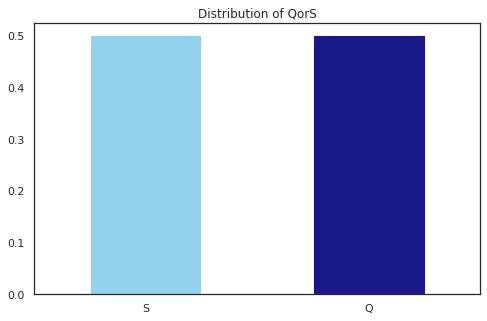

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
dogs.QorS.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Distribution of QorS')
plt.show()

Unlike some of the other datasets we used in this class, the distribution of this dataset in terms of the classifier is balanced. Thus, we do not need to do implement any techniques such as undersample majority or oversample minority to fix any imbalances.

As for probability smoothing (Additive, Laplace, Lidstone, etc.), Naive Bayes is based on frequency-based probability so it would be a problem if a probability would be zero and we need to divide that probability. Thus, we can avoid this issue by adding a static value to the probability to generate a non-zero value.

We can also utilize some stop words in our corpus to reduce the amount of redundant information our classification algorithm will be running through. Stop words are words that can be considered neutral (**as**, **be**, **you**, etc.) and do not have much of an affect on the classification algorithm. Sklearn has a built-in function to filter out some common stop words.

On the other hand, for this dataset we are looking to classify whether a corpus is a Question or a Statement. Stop words such as **would**, **will**, **how**, **is**, etc. are necessary for our classification algorithm because these stop words are specificlly used when forming a question rather than a statement.

For this dataset, let's compare the results of corpus with and without utilizing stop words.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

**1) Make the data usable by your computer. Your computer is illiterate and would prefer that you transformed English words and sentences to some kind of numerical representation, such as Bag of Words, TF-IDF, or another applicable technique. Again, explain why you chose what you did. Display the results of your vectorization.**

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dogs['Phrase'])

cv_stop = CountVectorizer(stop_words='english', ngram_range = (1,1),tokenizer = token.tokenize)
text_counts_stop = cv_stop.fit_transform(dogs['Phrase'])

Bag of Words (BOW) is a text classification that converts text into the form of numbers which can then be used in an algorithm for analysis. It returns a vector with all the words and number of times each word is repeated. Rather than the specific order of words in a corpus, BOW is only concerned with the number of times is repeated. As shown below in the following code, each unique word in the BOW becomes a column and each corpus is a row.

Although TF-IDF is generally considered to perform better with Naive Bayes classification, I chose to use Bag of Words because I believe that the corpus in the dataset are not long enough to benefit or recognize the importance of frequency of words. Given that we know we are trying to classify between Questions and Statements, what is more important is identifying whether question words such as **what**, **when**, **where**, etc. are present in the corpus to determine the classification. 

In [84]:
text_counts

<40x177 sparse matrix of type '<class 'numpy.int64'>'
	with 308 stored elements in Compressed Sparse Row format>

In [85]:
text_counts.shape

(40, 177)

In [114]:
vocab = cv.get_feature_names()
bow_df = pd.DataFrame(data=text_counts.toarray(), columns=vocab)
pd.set_option('display.max_columns', None)
bow_df.head()

,1,101,2,3,30,42,44,a,about,absorb,adult,always,an,and,any,anything,are,as,average,bad,based,be,beat,behaviour,behaviours,being,body,breed,can,case,cheetah,chemicals,colour,come,common,compass,corrode,could,dalmatians,deaf,deal,did,diseases,distance,do,does,doesnt,dog,dogs,done,dont,dream,ear,eat,ever,ewoks,eyelids,families,favorite,favourite,feel,fingerprints,food,foods,for,funniest,games,gets,go,good,grass,greyhound,guilt,handed,happy,hardest,has,have,help,how,howl,human,if,in,inches,involving,is,it,just,leave,left,like,likely,long,mean,memory,metal,more,much,my,name,naughtiest,need,needed,nickname,no,noseprints,noses,not,of,often,on,one,or,out,outside,owner,owns,pet,pets,poisonous,powerful,race,reacts,really,reason,right,s,scared,scent,see,sense,should,significance,sinking,smell,specific,star,states,supposed,survived,tail,tails,tall,tallest,teeth,temperature,than,the,their,there,they,theyre,thing,three,titanic,to,toilet,toys,united,up,urine,wag,wagging,walk,wars,were,wet,what,when,whiskers,why,with,work,world,you,your
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
text_counts_stop

<40x123 sparse matrix of type '<class 'numpy.int64'>'
	with 159 stored elements in Compressed Sparse Row format>

In [12]:
text_counts_stop.shape

(40, 123)

In [113]:
vocab2 = cv_stop.get_feature_names()
bow_stop_df = pd.DataFrame(data=text_counts_stop.toarray(), columns=vocab2)
pd.set_option('display.max_columns', None)
bow_stop_df.head()

,1,101,2,3,30,42,44,absorb,adult,average,bad,based,beat,behaviour,behaviours,body,breed,case,cheetah,chemicals,colour,come,common,compass,corrode,dalmatians,deaf,deal,did,diseases,distance,does,doesnt,dog,dogs,dont,dream,ear,eat,ewoks,eyelids,families,favorite,favourite,feel,fingerprints,food,foods,funniest,games,gets,good,grass,greyhound,guilt,handed,happy,hardest,help,howl,human,inches,involving,just,leave,left,like,likely,long,mean,memory,metal,naughtiest,need,needed,nickname,noseprints,noses,outside,owner,owns,pet,pets,poisonous,powerful,race,reacts,really,reason,right,s,scared,scent,sense,significance,sinking,smell,specific,star,states,supposed,survived,tail,tails,tall,tallest,teeth,temperature,theyre,thing,titanic,toilet,toys,united,urine,wag,wagging,walk,wars,wet,whiskers,work,world
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**2) Explain how you would want to do train/test splitting. Remember, this is a very tiny data set (n = 40). You may well encounter some problems by just randomly splitting into train/test sets and going along. Why?**

Sklearn has a built-in function that randomly (can be changed for reproducability using random_state) splits data arrays into two subsets: training data and testing data. The default test_size is 25%, so this dataset would be split into 30 training data and 10 testing data. Given that there is an even distribution of 20 Q and 20 S, if train/test is randomly obtaining 10 testing data for the 40 total there is a possibility that it will grab a inbalanced number of Q and S for the data. 

You can resolve this issue by using the stratify method to collect an even distribution of train/test data if the dataset you use is inbalanced. You are also allowed to turn off the randomness of splitting the dataset by using shuffle=False. This will split the dataset in order (e.g. take the last 25% of the dataset as test data).    

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dogs['QorS'], test_size=0.25, random_state=5)

In [62]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(text_counts_stop, dogs['QorS'], test_size=0.25, random_state=5)

**3) Use Naive Bayes to classify, and discuss the results. What did Naive Bayes actually do to figure out what class each test sample went in to? Give a basic rundown using one sample. Are posterior values generated by Naive Bayes to be taken at face value? What are some assumptions about this data set, or any data, that Naive Bayes makes that are clearly wrong? Why might Naive Bayes be good despite these faulty assumptions at classifying when the number of features is large compared to the size of the data set, as is often the case in text classification compared to other ML problems. Add any further insight you might have.**

In [63]:
from sklearn.naive_bayes import MultinomialNB

Multinomial Naive Baynes (with Laplace Smoothing) with the corpus not utilizing stopwords.

In [64]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [154]:
df = pd.DataFrame(data=X_train.toarray(), columns=vocab)
pd.set_option('display.max_columns', None)
df.to_csv('X_train.csv')
df.head()

,1,101,2,3,30,42,44,a,about,absorb,adult,always,an,and,any,anything,are,as,average,bad,based,be,beat,behaviour,behaviours,being,body,breed,can,case,cheetah,chemicals,colour,come,common,compass,corrode,could,dalmatians,deaf,deal,did,diseases,distance,do,does,doesnt,dog,dogs,done,dont,dream,ear,eat,ever,ewoks,eyelids,families,favorite,favourite,feel,fingerprints,food,foods,for,funniest,games,gets,go,good,grass,greyhound,guilt,handed,happy,hardest,has,have,help,how,howl,human,if,in,inches,involving,is,it,just,leave,left,like,likely,long,mean,memory,metal,more,much,my,name,naughtiest,need,needed,nickname,no,noseprints,noses,not,of,often,on,one,or,out,outside,owner,owns,pet,pets,poisonous,powerful,race,reacts,really,reason,right,s,scared,scent,see,sense,should,significance,sinking,smell,specific,star,states,supposed,survived,tail,tails,tall,tallest,teeth,temperature,than,the,their,there,they,theyre,thing,three,titanic,to,toilet,toys,united,up,urine,wag,wagging,walk,wars,were,wet,what,when,whiskers,why,with,work,world,you,your
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
Y_train.head()

0     Q
26    S
2     Q
34    S
38    S
Name: QorS, dtype: object

In [135]:
train = [0, 26, 2 , 34, 38]
for x in train:
  print(dogs.iloc[x],)

Phrase    Why do dogs eat grass
QorS                          Q
Name: 0, dtype: object 

Phrase    A wagging tail doesnt always mean they are happy
QorS                                                     S
Name: 26, dtype: object 

Phrase    Why do dogs howl
QorS                     Q
Name: 2, dtype: object 

Phrase    The Ewoks in Star Wars were based on a dog
QorS                                               S
Name: 34, dtype: object 

Phrase    More than 1 in 3 families in the United States...
QorS                                                      S
Name: 38, dtype: object 



For the first corpus of our X_train dataset, it contains the following unique words: do, dogs, eat, grass, why. It's corresponding classification in the Y_train dataset denotes it as a Q. This is clear to see since if we rearrange the 5 words it becomes "why do dogs eat grass" - which is considered a question.

Let's begin using our testing dataset to make predictions based on the training dataset.

In [136]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [137]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

80.00%


In [138]:
print('Test:')
print(Y_test)
print('Predicted:', predicted)

Test:
20    S
22    S
24    S
3     Q
23    S
6     Q
4     Q
39    S
28    S
5     Q
Name: QorS, dtype: object
Predicted: ['S' 'S' 'Q' 'Q' 'S' 'Q' 'Q' 'S' 'Q' 'Q']


In [139]:
df = pd.DataFrame(data=X_test.toarray(), columns=vocab)
pd.set_option('display.max_columns', None)
df.head()

,1,101,2,3,30,42,44,a,about,absorb,adult,always,an,and,any,anything,are,as,average,bad,based,be,beat,behaviour,behaviours,being,body,breed,can,case,cheetah,chemicals,colour,come,common,compass,corrode,could,dalmatians,deaf,deal,did,diseases,distance,do,does,doesnt,dog,dogs,done,dont,dream,ear,eat,ever,ewoks,eyelids,families,favorite,favourite,feel,fingerprints,food,foods,for,funniest,games,gets,go,good,grass,greyhound,guilt,handed,happy,hardest,has,have,help,how,howl,human,if,in,inches,involving,is,it,just,leave,left,like,likely,long,mean,memory,metal,more,much,my,name,naughtiest,need,needed,nickname,no,noseprints,noses,not,of,often,on,one,or,out,outside,owner,owns,pet,pets,poisonous,powerful,race,reacts,really,reason,right,s,scared,scent,see,sense,should,significance,sinking,smell,specific,star,states,supposed,survived,tail,tails,tall,tallest,teeth,temperature,than,the,their,there,they,theyre,thing,three,titanic,to,toilet,toys,united,up,urine,wag,wagging,walk,wars,were,wet,what,when,whiskers,why,with,work,world,you,your
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
dogs.iloc[20]

Phrase    Dogs dont feel guilt
QorS                         S
Name: 20, dtype: object

Based on our training dataset, Naive Bayes takes the probability of unique words appearing within each class. For example, the first row in the test dataset contain the words: **dogs**, **dont**, **feel**, **guilt**. Within our training dataset(n=30) the probability of these words appearing out of 177 unique words for each class is:

*   P(dogs | ...):
        > Q: 4+1(Laplace Smoothing)/16+177 = 0.0259

        > S: 6+1/14+177 = 0.0363

*   P(dont | ...):
        > Q: 0+1/16+177 = 0.0052

        > S: 0+1/14+177 = 0.0052

*   P(feel | ...):
        > Q: 0+1/16+177 = 0.0052

        > S: 0+1/14+177 = 0.0052

*   P(guilt | ...):
        > Q: 0+1/16+177 = 0.0052

        > S: 0+1/14+177 = 0.0052

*   P(dogs dont feel guilt | ...):
        > Q: 0.0259 * (0.0052 * 3) = 0.00040404

        > S: 0.0363 * (0.0052 * 3) = 0.00056628

The MNB model determined that P(dogs dont feel guilt | S) had a better probability based on the training data, thus it predicts this corpus in the test dataset as an S.

As a result, the testing set was able to predict the classification with an accuracy score of 8/10 or 80%.

Multinomial Naive Baynes (with Laplace Smoothing) with the corpus utilizing stopwords.

In [155]:
MNB_stop = MultinomialNB()
MNB_stop.fit(X_train2, Y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [156]:
from sklearn import metrics
predicted2 = MNB_stop.predict(X_test2)
accuracy_score2 = metrics.accuracy_score(predicted2, Y_test2)

In [157]:
print(str('{:04.2f}'.format(accuracy_score2*100))+'%')

70.00%


In [158]:
print('Test:')
print(Y_test2)
print('Predicted:', predicted2)

Test:
20    S
22    S
24    S
3     Q
23    S
6     Q
4     Q
39    S
28    S
5     Q
Name: QorS, dtype: object
Predicted: ['Q' 'S' 'S' 'S' 'Q' 'Q' 'Q' 'S' 'S' 'Q']


For the MNB using stop words, the testing set was able to predict the classification with an accuracy score of 7/10 or 70%. The accuracy is less than our previous results likely because of the removal of question words such as **what**, **will**, **where**, etc. which are also considered stop words. However, we must acknowledge that the dataset is small(n=40) so that is also a factor for the different results.

Naive Bayes runs on the assumption that features are independent of eachother. For this dataset, words are independent of eachother because Bag of Words was used to vectorize the corpus. However, this is not true in the real world because how we form sentences and the meaning behind our words are based on the order and relations between words (such as compound words). As such the posterior values or probabilities generated by Naive Bayes based on our training dataset cannot be taken at face value but we can still utilize them.

Despite these obvious flaws, Naive Bayes is able to run efficiently due to how fast training and classification can be done regardless of how small or large the dataset is. Classification decision is based on which class has the higher probability score. Looking at our previous calculations above, the training dataset only had data on the word **dogs** and not **dont**, **feel** and **guilt**. However, we were still able to make a classification that "**dogs dont feel guily**" was class S because the distribution of the word **dogs** had appeared within class S corpus six times while **dogs** only appeared within class Q corpus four times. While Naive Bayes is not a good estimator, it can still be used a decent classifier.